## BIA Tischi demo
BIA Tischi is a Jupyter-magic based assistant for interacting with data via code

In [1]:
import numpy as np
from bia_tischi import tischi
tischi.__version__

'0.1.0'

We initially give tischi access to all variables in the current scope.

In [2]:
tischi.initialize(globals())

Turn on debug mode to see what happens

In [3]:
# from bia_tischi._machinery import _context
# _context.verbose = True

It works using the `%tischi` and `%%tischi` magic commands. Just enter tasks and ask questions. Hint: if you want to ask a question, you need to put a space before the `?`.

In [4]:
a = 5

In [5]:
%tischi print out the variable a

Here is the Python code to print variable a.

```python
print(a)
```

5


```python
import matplotlib.pyplot as plt
from skimage import io

# Loading image
input_image = io.imread('blobs.tif')

# Using matplotlib to visualize the image
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.show()
```

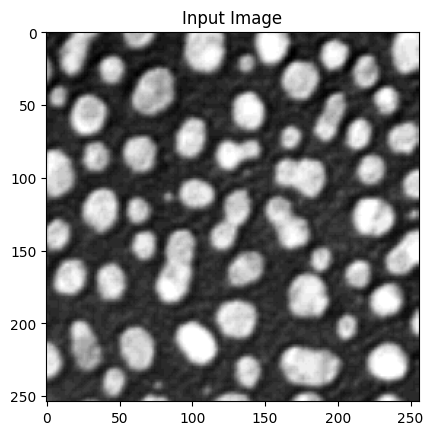

In [6]:
%tischi load "blobs.tif", store it in the variable input_image and visualize it

Here is python code that meets the requirements provided:

```python
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.segmentation import clear_border
from skimage.color import label2rgb 

# apply otsu's threshold
thresh = threshold_otsu(input_image)
binary = input_image > thresh

# apply connected component labeling
label_image = label(binary)

# visualize the result
image_label_overlay = label2rgb(label_image, image=input_image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

ax.set_axis_off()
plt.tight_layout()
plt.show()
```

Please ensure to replace `input_image` variable with your actual image numpy array before running the code.

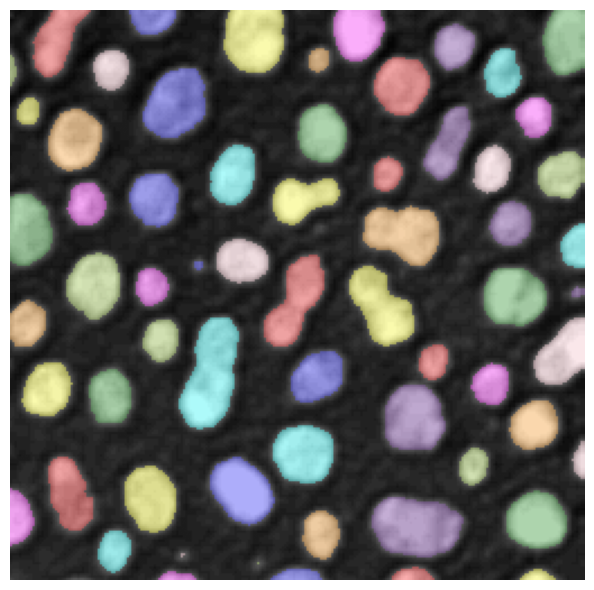

In [7]:
%%tischi 
* Use Otsu's method to segment the image stored in the variable input_image, 
* apply connected component labeling to label individual objects, 
* store the result in the variable label_image, and 
* visualize the result

In [8]:
%tischi print out the number of objects in the label_image

The number of objects or unique labels in the `label_image` can be calculated using the `np.unique` function. This function returns the sorted unique elements of an array, and by checking the length of the returned array, we can determine the number of unique labels or objects in the `label_image`.  

You can use the following python code:

```python
# Get the unique labels in the label_image
unique_labels = np.unique(label_image)

# Number of objects is the length of unique labels, subtracting 1 for the background label
num_objects = len(unique_labels) - 1

# print the number of objects
print("Number of objects in the label_image: ", num_objects)
```
In this code, we subtract 1 from the length of `unique_labels` because the background pixels are also labelled, and we don't want to count the background as an object.

Number of objects in the label_image:  64


In [9]:
%tischi measure mean_intensity and major axis length of the objects in the input_image using the label_image as labels. Store the result in a dataframe called df

To measure the mean_intensity and the major_axis_length of objects in the image, the regionprops function of skimage.measure module and pandas are used. Please see the written code below:

```python
from skimage.measure import regionprops_table
import pandas as pd

props = regionprops_table(label_image, intensity_image=input_image, properties=('mean_intensity', 'major_axis_length'))
df = pd.DataFrame(props)
```

In this code, regionprops_table calculates the properties specified in its parameters ('mean_intensity' and 'major_axis_length') for each labeled region in the label_image. The resulting measurements are stored in a dictionary, which is then converted into a pandas DataFrame.

In [11]:
%tischi show the dataframe df

Below is the Python code which is used to display the dataframe df:

```python
print(df)
```

Moreover, you could also use the head() function to display the first few lines of data:

```python
print(df.head())
```
The head() function is often used to take a glimpse at the data to understand its structure. By default, it shows the first 5 rows of data. You can specify the number of rows in the parentheses if you want to see more or less rows. If you want to see the last few rows of data, you could use the tail() function.

Similarly, to show a summary of the dataframe, you can use:

```python
print(df.describe())
```
The describe() function provides the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

    mean_intensity  major_axis_length
0       190.854503          34.957399
1       179.286486          21.061417
2       205.617021          30.212552
3       217.327189          24.535398
4       212.142558          31.162612
..             ...                ...
59      128.000000           0.000000
60      183.407407          18.558405
61      181.511111          22.458271
62      188.377358          14.811463
63      172.897959          17.127524

[64 rows x 2 columns]
   mean_intensity  major_axis_length
0      190.854503          34.957399
1      179.286486          21.061417
2      205.617021          30.212552
3      217.327189          24.535398
4      212.142558          31.162612
       mean_intensity  major_axis_length
count       64.000000          64.000000
mean       187.727254          24.195781
std         19.041565           9.916696
min        128.000000           0.000000
25%        181.168929          18.505240
50%        189.748696          23.649826
75%        1

In [ ]:
%tischi plot the mean_intensity against major_axis_length in the dataframe df 

In [ ]:
%tischi show a histogram of mean_intensity

Here is a Python code that uses skimage, matplotlib, and scipy to segment all nuclei in the image. Please make sure you have the right image file path for the `imread` function.

```python
from skimage import filters
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.io import imread

# load the image
input_image = imread("blobs.tif")

# apply Otsu's thresholding
thresh = filters.threshold_otsu(input_image)
binary = input_image > thresh

# remove artifacts connected to image border
cleared = clear_border(binary)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=input_image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

# calculate number of unique labels (nuclei)
unique_labels = np.unique(label_image)
num_objects = unique_labels.shape[0]

print(f"Detected {num_objects} nuclei")
```

This code will show the resulting labeled nuclei image and print out the number of detected nuclei. To save the resulted image or data, you can use skimage.io.imsave() function or any other appropriate functions.

Detected 47 nuclei


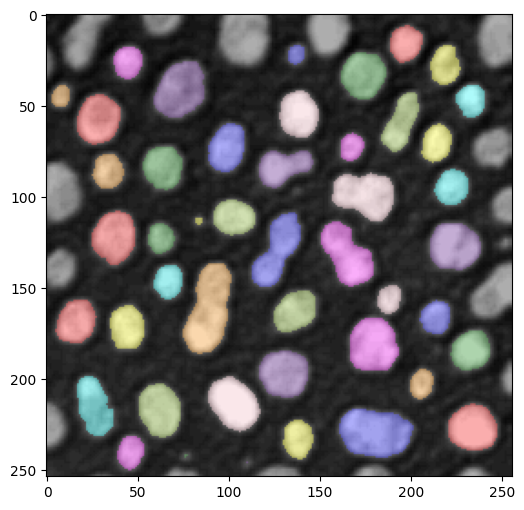

In [13]:
%%tischi 
please segment all nuclei in the blobs.tif fluorescence microscopy grayscale image 
and show the resulting label mask

The following code should be used to accomplish these tasks:

```python
#Import Necessary Libraries
from skimage import measure, io, filters, exposure, segmentation, color
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.util import img_as_ubyte
from skimage.filters import threshold_otsu

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage as ndi
import numpy as np
import pandas as pd

#Read the grayscale image
input_image = imread('blobs.tif', as_gray=True)

#Threshold the image using Otsu's thresholding method
thresh = threshold_otsu(input_image)
binary = input_image > thresh

#Label each region, essentially segmenting the image
label_image = label(binary)

#Apply a pseudocolor to the labeled image for better visualization
image_label_overlay = label2rgb(label_image, image=input_image)

#Use regionprops to gather properties of the segmented regions
props = regionprops(label_image)
df = pd.DataFrame(props)

#Create a frame around the image for easy viewing
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

#count the unqiue labels (nuclei)
num_objects = len(np.unique(label_image)) 
print("Number of nuclei in image: ", num_objects - 1)

#Improve the contrast of the image using equalization
nuclei_image = exposure.equalize_hist(image_label_overlay)

#Show the improved image
plt.imshow(nuclei_image, cmap='gray')
plt.title('Nuclei in grayscale image after segmentation')
plt.show()
```

The first part of the code reads the image, converts it to grayscale, and applies Otsu's thresholding method to binarize the image. It then labels each connected component in the binary image using the `label()` function, which essentially segments the image. 

The label image is then overlaid onto the original image using a pseudocolor scheme for better visualization. Then, the `regionprops()` function is used to extract properties of each segmented region and store them in a pandas DataFrame.

Finally, the number of unique labels (which also corresponds to the number of nuclei) is printed, and the image is displayed using matplotlib's `imshow()` function.

Please replace 'blobs.tif' with your image path.

Number of nuclei in image:  64


/Users/tischer/mambaforge/envs/chat-gpt-jupyter/lib/python3.9/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


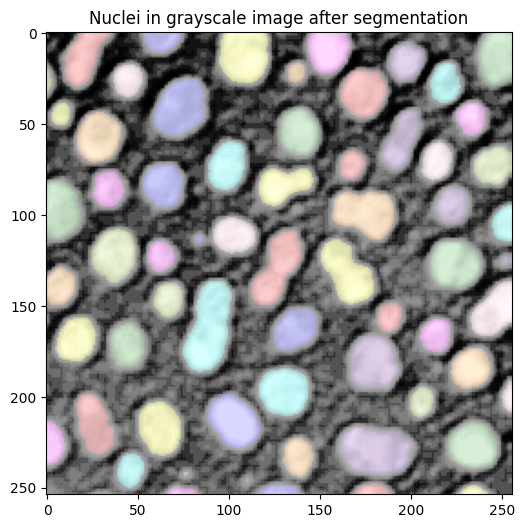

In [17]:
%%tischi 
please segment all nuclei in the blobs.tif grayscale image 
and show the resulting label mask

UsageError: Cell magic `%%` not found.
